In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yuiyuiojouyy/dataset_combine_dialect.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# !conda install -y gdown
# !gdown --id 1GItQZtqxf4v6szP_Tf3gcM0taib0F1SH

In [4]:
df = pd.read_csv('/kaggle/input/yuiyuiojouyy/dataset_combine_dialect.csv')

In [5]:
df.head()

,text,dialect
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE


In [6]:
def freq_words_removal(text, lst_words):
    lst_text = text.split()
    if lst_words is not None:
        lst_text = [word for word in lst_text if word not in lst_words]
    text = " ".join(lst_text)
    return text

In [7]:
wrds = ['مع','لا','على','من','ما','في','الي','هو','انا','أنا','اله']
df["tweet_clean"] = df["text"].apply(lambda x: freq_words_removal(x, wrds))

In [8]:
df.head(5)

,text,dialect,tweet_clean
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE,شو قاعد يجري فالنصر يا أخوه خسر المباراة سقطة ...
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE,يبحث عن مشكلة الوصل راح يحصلها فالجولان
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE,مش معترض تغير عامر دخل مكان عامر المفترض ريان ...
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE,تراجع مخيف مستوى الحارس الكبير ماجد ناصر مش ما...


In [9]:
#Shuffle the dataset
df = df.reindex(np.random.permutation(df.index))
df['LABEL'] = 0

In [10]:
df

,text,dialect,tweet_clean,LABEL
297828,اقل من ساعةعن مباراة منتخبنا الانڤليز اليوم نب...,TN,اقل ساعةعن مباراة منتخبنا الانڤليز اليوم نبيل ...,0
196958,خيره لك وتاكدي كل ما يحصل حياتك خيره والخير في...,OM,خيره لك وتاكدي كل يحصل حياتك خيره والخير فيما ...,0
267842,تقيفو معاه ولا خلاص الرسالة وصلت لفئة المقصودة,SD,تقيفو معاه ولا خلاص الرسالة وصلت لفئة المقصودة,0
351239,جون ميجر جون ميجر سياسي بريطاني ولد في مارس بج...,MSA,جون ميجر جون ميجر سياسي بريطاني ولد مارس بجنوب...,0
230997,محمدبنسلمانفيبريطانيا هالمره وش ناوي يشتري خوف...,QA,محمدبنسلمانفيبريطانيا هالمره وش ناوي يشتري خوف...,0
...,...,...,...,...
130183,نعم الترفيه صناعه مجالها كبير جدا في دول اقتصا...,KW,نعم الترفيه صناعه مجالها كبير جدا دول اقتصادها...,0
360728,أشعر بهذا الشعور منذ اليلة الماضية,MSA,أشعر بهذا الشعور منذ اليلة الماضية,0
95631,عندي بالفيس بس مشتاقلك واله,JO,عندي بالفيس بس مشتاقلك واله,0
271010,هبشو ليهم خمستهم الفارات,SD,هبشو ليهم خمستهم الفارات,0


In [11]:
!pip install keras


In [12]:
from keras.utils import to_categorical

# Assuming 'LABEL' column contains your labels and you're using a Pandas DataFrame named df
labels = df['LABEL']  # Extracting the labels from the DataFrame

# One-hot encode the labels
one_hot_labels = to_categorical(labels)



In [13]:
# from keras.utils.np_utils import to_categorical


#One-hot encode the lab
df.loc[df['dialect'] == 'SA', 'LABEL'] = 0
df.loc[df['dialect'] == 'QA', 'LABEL'] = 1
df.loc[df['dialect'] == 'KW', 'LABEL'] = 2
df.loc[df['dialect'] == 'AE', 'LABEL'] = 3
df.loc[df['dialect'] == 'OM', 'LABEL'] = 4
df.loc[df['dialect'] == 'JO', 'LABEL'] = 5
df.loc[df['dialect'] == 'PL', 'LABEL'] = 6
df.loc[df['dialect'] == 'BH', 'LABEL'] = 7
df.loc[df['dialect'] == 'LY', 'LABEL'] = 8
df.loc[df['dialect'] == 'EG', 'LABEL'] = 9
df.loc[df['dialect'] == 'SD', 'LABEL'] = 10
df.loc[df['dialect'] == 'IQ', 'LABEL'] = 11
df.loc[df['dialect'] == 'LB', 'LABEL'] = 12
df.loc[df['dialect'] == 'SY', 'LABEL'] = 13
df.loc[df['dialect'] == 'TN', 'LABEL'] = 14
df.loc[df['dialect'] == 'DZ', 'LABEL'] = 15
df.loc[df['dialect'] == 'MA', 'LABEL'] = 16
df.loc[df['dialect'] == 'YE', 'LABEL'] = 17
print(df['LABEL'][:10])
labels = to_categorical(df['LABEL'], num_classes=18)
print(labels[:10])
if 'dialect' in df.keys():
    df.drop(['dialect'], axis=1)

297828    14
196958     4
267842    10
351239     0
230997     1
232506     1
256980     0
289658    13
141326    12
99150      5
Name: LABEL, dtype: int64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
df.head(10)

,text,dialect,tweet_clean,LABEL
297828,اقل من ساعةعن مباراة منتخبنا الانڤليز اليوم نب...,TN,اقل ساعةعن مباراة منتخبنا الانڤليز اليوم نبيل ...,14
196958,خيره لك وتاكدي كل ما يحصل حياتك خيره والخير في...,OM,خيره لك وتاكدي كل يحصل حياتك خيره والخير فيما ...,4
267842,تقيفو معاه ولا خلاص الرسالة وصلت لفئة المقصودة,SD,تقيفو معاه ولا خلاص الرسالة وصلت لفئة المقصودة,10
351239,جون ميجر جون ميجر سياسي بريطاني ولد في مارس بج...,MSA,جون ميجر جون ميجر سياسي بريطاني ولد مارس بجنوب...,0
230997,محمدبنسلمانفيبريطانيا هالمره وش ناوي يشتري خوف...,QA,محمدبنسلمانفيبريطانيا هالمره وش ناوي يشتري خوف...,1
232506,اسينسيو بدل ايسكو اتمني تصير في بداية شوط ثاني,QA,اسينسيو بدل ايسكو اتمني تصير بداية شوط ثاني,1
256980,كلمهنفسيهتهديهالمين لك أنت ياصاحب الهاشتاق,SA,كلمهنفسيهتهديهالمين لك أنت ياصاحب الهاشتاق,0
289658,حتى الطحالب مو مسجلهم فقط الاتحاد والشباب,SY,حتى الطحالب مو مسجلهم فقط الاتحاد والشباب,13
141326,ما بحياتنا وصلنا لهالمرحلة انو السلطة ترضخ,LB,بحياتنا وصلنا لهالمرحلة انو السلطة ترضخ,12
99150,وك جعل ما حد خطب غيرك انتي,JO,وك جعل حد خطب غيرك انتي,5


In [15]:
!pip install keras

In [16]:
!pip install keras-preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00


In [17]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

n_most_common_words = 20000
max_len = 250
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['tweet_clean'].values)
sequences = tokenizer.texts_to_sequences(df['tweet_clean'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 425435 unique tokens.


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.1, random_state=42)

In [19]:
epochs = 25
emb_dim = 128
batch_size = 256
labels[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [20]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping



print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(18, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())


((329147, 250), (329147, 18), (36572, 250), (36572, 18))
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          2560000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 128)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 18)                1170      
                                                                 
Total params: 2610578 (9.96 MB)
Trainable params: 2610578 (9.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [21]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=6, min_delta=0.0001)])

Epoch 1/25
1029/1029 [==============================] - 806s 779ms/step - loss: 2.4091 - acc: 0.2330 - val_loss: 1.9557 - val_acc: 0.3702
Epoch 2/25
1029/1029 [==============================] - 791s 768ms/step - loss: 2.0171 - acc: 0.3482 - val_loss: 1.8010 - val_acc: 0.4163
Epoch 3/25
1029/1029 [==============================] - 789s 767ms/step - loss: 1.8842 - acc: 0.3912 - val_loss: 1.7412 - val_acc: 0.4402
Epoch 4/25
1029/1029 [==============================] - 798s 775ms/step - loss: 1.8085 - acc: 0.4182 - val_loss: 1.6973 - val_acc: 0.4573
Epoch 5/25
1029/1029 [==============================] - 793s 771ms/step - loss: 1.7562 - acc: 0.4371 - val_loss: 1.6684 - val_acc: 0.4719
Epoch 6/25
1029/1029 [==============================] - 791s 769ms/step - loss: 1.7190 - acc: 0.4503 - val_loss: 1.6570 - val_acc: 0.4774
Epoch 7/25
1029/1029 [==============================] - 792s 770ms/step - loss: 1.6887 - acc: 0.4628 - val_loss: 1.6361 - val_acc: 0.4859
Epoch 8/25
1029/1029 [============

In [22]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1143/1143 [==============================] - 36s 32ms/step - loss: 1.6097 - acc: 0.5037
Test set
  Loss: 1.610
  Accuracy: 0.504


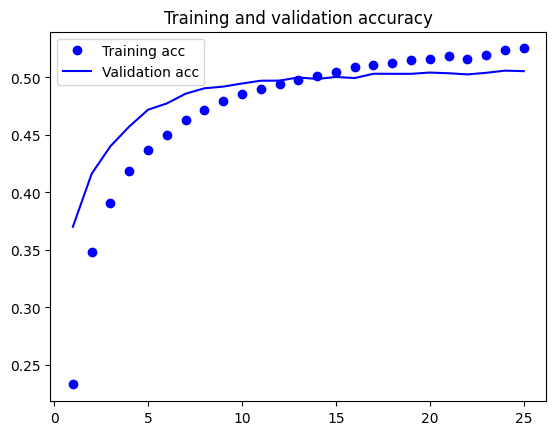

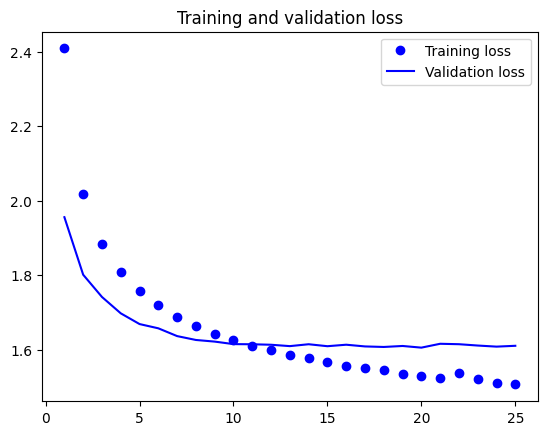

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

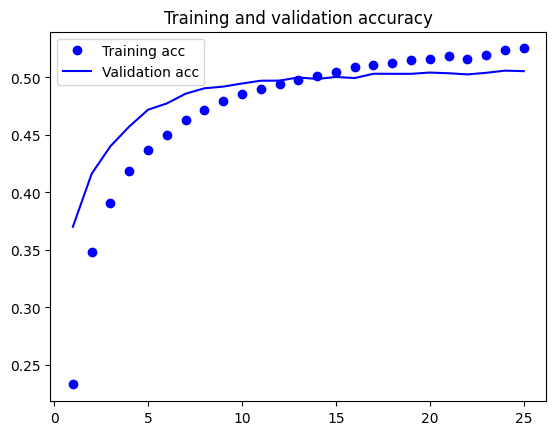

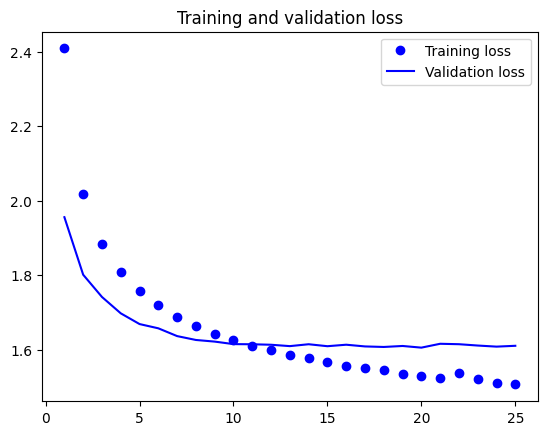

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# عشان تنقبل لازمك تعمل كويس مش تبقى نايم كده

In [25]:
txt = ["فاش كتوصل 4 د الليل وباقي مانعستيش"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['SA','QA','KW','AE','OM','JO','PL','BH','LY','EG','SD','IQ','LB','SY','TN','DZ','MA','YE']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 315ms/step
[[1.2893110e-04 3.0861534e-05 8.5972686e-05 7.9781683e-05 8.5899657e-05
  3.3717573e-05 1.2692495e-04 2.3031171e-04 6.5637017e-03 1.3960707e-04
  7.6095774e-03 1.2437424e-04 1.3462806e-04 2.0933572e-04 8.2762793e-02
  1.4684219e-02 8.8691097e-01 5.8377042e-05]] MA


In [27]:
# The code you provided

# Assuming the model training has been completed successfully
# Saving the trained model
model.save('Dialect_classification_model_lstm.h5')
print("Model saved successfully.")


Model saved successfully.


In [30]:
from tensorflow.keras.models import load_model

# Load the trained model
modelA = load_model('Dialect_classification_model_lstm.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [33]:
txt = ["عشان تنقبل لازمك تعمل كويس مش تبقى نايم كده"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)  # Assuming you have defined `max_len`
pred = modelA.predict(padded)
labels = ['SA', 'QA', 'KW', 'AE', 'OM', 'JO', 'PL', 'BH', 'LY', 'EG', 'SD', 'IQ', 'LB', 'SY', 'TN', 'DZ', 'MA', 'YE']
predicted_label = labels[np.argmax(pred)]
print(pred, predicted_label)

1/1 [==============================] - 0s 44ms/step
[[6.2127196e-04 6.2448857e-04 4.7383294e-04 3.0227038e-03 3.6598285e-04
  6.8539870e-03 4.4943579e-02 3.7773870e-04 8.4192511e-03 8.1925243e-01
  3.5766996e-02 1.6358263e-03 1.9073355e-03 1.8251145e-03 2.6246684e-02
  4.2933721e-02 2.4335973e-03 2.2955793e-03]] EG
